<a href="https://colab.research.google.com/github/ronen-halevy/ai-notebooks/blob/main/Copy_of_Copy_of_Building_Tensorflow_Image_Input_Pipeline_Part_3_Using_ImageGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Building Tensorflow Image Input Pipeline Part 3-Using ImageGenerator
---


## Introduction
---


The Input Data Pipeline is the preprocessing stage of the Neural Network. It operates in an **`ETL`** (**E**xtract, **T**ransform, **L**oad) pipelined process, as depicted in the figure which follows.


**`Input Pipeline`:**


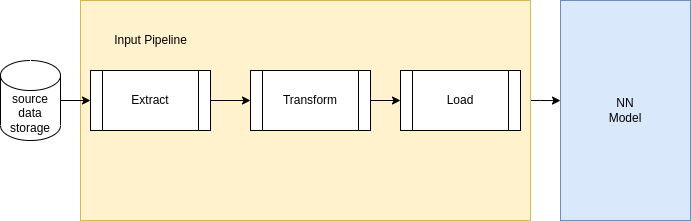

### **Input Pipeline Outlines**
---



The **Extract** block fetches data from input data source, which in case of Image Data Networks are most likely data files, and arranges them as dataset memory objects in local memory.

The **Transform** block, transformd the data to create an efficient input data set. Most of the transforms are regarded `Performance Transforms` as they format the data to achieve better compute performance.


The **Load** block transfers the data to the Network's input layer. 



### **Commonly used Data Transforms:**
---



- **Image Decoding** - decode either from jpeg or any coding format.
- **Data batching** - batches of data, be it image data or not, are required for an efficient parralelized process in general, and speciffically better exploits GPUs parralelism capabilities.
.
- **Resize** - Networks require uniform sized images only. Since source data images are mostly uniform in size, a `resize` operation is mandatory. Now, which is size to resize to? The answer is not always straight forward and definite. There are tradeoffs such as a tradeoff between details preservation vs compution and memory load. Anyway, we will set dimenssions such that after downsizing both height and width ramain integrer.



- **Rescale** - Rescales every value of an input by multiplying by scale and adding offset.



- **Caching** - avoid reloading at each epoch fitting cycle. Large datasets which do not fit in memory, should not be cached.

- **Shuffle** - which randomized the data loading sequence order.
- **Prefetch** - supports concurrent data prefetching and data processing.
- **Data Augmentation** - expands training dataset, increases the diversity of training set, by applying transformations, such as image rotation, flips, shifts.


### **About the series of posts**

This page is part of a series posts about **Building An Tensorflow Image Input Pipeline**.

Each post of this series presents one approach for the creation of an input image data pipeline, each uses a different set of APIs.

They differ in aspects such as level of integration (some are more integrated convinience api while others are less integrated but sometimes more flexible), and also differ in terms of efficiency and performance, (the `ImageGenerator` approach proves to be less performant)

Still, all approaches create a tensorflow dataset object which is an itegrated part of the Neural Netork Graph, along with the NN model, thus providing a smooth data integration throughout the process.

### Description of the Posts Contents

Each of the posts illustrates the creation of the input pipeline in the context of a data classification example, using various data sources: `rock-paper-scissors`, `flowers` and `horses or humans`


### List of the series posts:
---


The posts of this series are: 


- **Building Tensorflow Image Input Pipeline Part 1**: Using tf.data()

- [**Building Tensorflow Image Input Pipeline Part 2**: Using Keras Utils](https://colab.research.google.com/drive/1s3EdMO2uMWQMtqsPxIZOS-cvA4QqfMls#scrollTo=gpz8q177vSBj&uniqifier=2)

- **Building Tensorflow Image Input Pipeline Part 3**: Using ImageGenerator()
- **Building Tensorflow Image Input Pipeline Part 4**: Using TFDS()


Each of the posts illustrates the creation of the dataset within an image classification example. 

Let's go dive into the code!

###**Notes About this post approach- data pipeline Creation with Keras Utils**
---



The Keras Utils approach provides convinience methods for a compact and easy yet efficient data pipeline implelementation.



### **Horses Or Humans**
---


The input data used in this example is the `Horses Or Humans` dataset, listed in [TensorFlow Datasets catalog](https://www.tensorflow.org/datasets/catalog/overview). The dataset was produced by [Lawrance Moroney](https://laurencemoroney.com/datasets.html), million thanks for him on that.

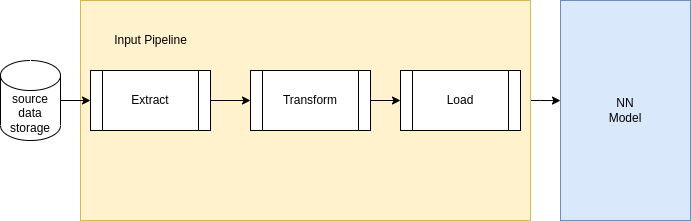

### **Input Pipeline Outlines**
---


The **Extract** block fetches data from input data source, which in case of Image Data Networks are most likely data files, arranges them as dataset memory objects in local memory.

The **Transform** block, naturally, transformd the data to create an efficient input data set. Most of the transforms are regarded `Performance Transforms` as they format the data to achieve better compute performance.


The **Load** block transfers the data to the Network's input layer. 



### **Commonly Used Data Transform**
---


- **Image Decoding** - decode either from jpeg or any coding format.
- **Data batching** - batches of data, be it image data or not, are required for an efficient parralelized process in general, and speciffically better exploits GPUs parralelism capabilities.
.
- **Resize** - Networks require uniform sized images only. Since source data images are mostly uniform in size, a `resize` operation is mandatory. Now, which is size to resize to? The answer is not always straight forward and definite. There are tradeoffs such as a tradeoff between details preservation vs compution and memory load. Anyway, we will set dimenssions such that after downsizing both height and width ramain integrer.



- **Normalize** (or better say scale) input data to the range [0,1]. A standardized  data range for all input data is essential for a better model Performance. 

- **Caching** of input data to avoid reloading at each epoch fitting cycle. Large datasets which do not fit in memory, should not be cached.

- **Shuffling** - which randomized the data loading sequence order.
- **Prefetch** which supports concurrent data prefetching and data processing.
- **Data Augmentation** which expands training dataset, increases the diversity of training set, by applying transformations, such as image rotation, flips, shifts.


### **About the series of posts**
---
This page is part of a series posts about **Building An Tensorflow Image Input Pipeline**.

Each post of this series presents one approach for the creation of an image input pipeline, each uses a different set of APIs.

They differ in aspects such as level of integration (some are more integrated convinience api while others are less integrated but sometimes more flexible), and also differ in terms of efficiency and performance, (the `ImageGenerator` approach proves to be less performant)

Still, all approaches create a tensorflow dataset object which is an itegrated part of the Neural Netork Graph, along with the NN model, thus providing a smooth data integration throughout the process.

### Description of the Posts Contents

Each of the posts illustrates the creation of the input pipeline in the context of a data classification example, using various data sources: `rock-paper-scissors`, `flowers`, and `horses or humans`


### List of the series posts:
---

The posts of this series are: 


- **Building Tensorflow Image Input Pipeline Part 1**: Using tf.data()

- [**Building Tensorflow Image Input Pipeline Part 2**: Using Keras Utils](https://colab.research.google.com/drive/1s3EdMO2uMWQMtqsPxIZOS-cvA4QqfMls#scrollTo=gpz8q177vSBj&uniqifier=2)

- **Building Tensorflow Image Input Pipeline Part 3**: Using ImageGenerator()
- **Building Tensorflow Image Input Pipeline Part 4**: Using TFDS()


Each of the posts illustrates the creation of the dataset within an image classification example. 

Let's go dive into the code!




##**About keras preprocessing ImageDataGenerator**
---
This page illustrate the building of the data pipeline with keras.preprocessing.ImageDataGenerator.

This approach provides a compact set of APIs on one hand, but proves to be less efficient in therms of computation speed comparing to other approaches. Note that it lacks performance transformations such as data caching, data prefetch.

ImageDataGenerator is my least prefereable approach, btw.




## 1. Import Packages
---

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
import random
import datetime

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## 2. Download the data
---
***Rock Paper Scissors***
We will use the `Rock Paper Scissors` dataset, listed in [TensorFlow Datasets catalog](https://www.tensorflow.org/datasets/catalog/overview). The dataset was produced by [Lawrance Moroney](https://laurencemoroney.com/datasets.html), million thanks for him on that.

####**Download Train Data files**

In [ ]:
import pathlib
dataset_name = 'rps'
dataset_url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip'
dataset_file = tf.keras.utils.get_file(origin=dataset_url, fname=dataset_name+'.zip', extract=True)

#####**Print path of downloaded file:**



In [ ]:
print(dataset_file)

/root/.keras/datasets/rps.zip


Having set the `get_file()` with `extract=True` attribute, the `zip` file was extracted automatically.

Image data file tree is now arranged as depicted in the diagram below.

####**Present Train Data File Tree**

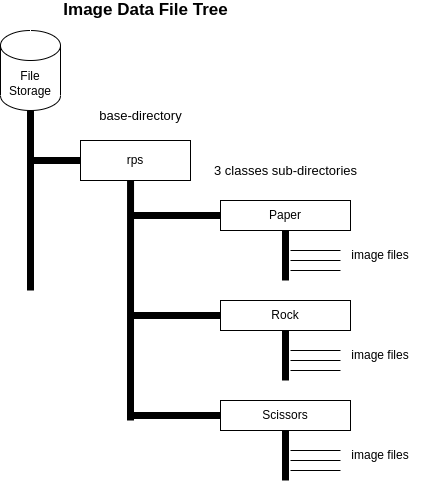

####**List downloaded and extracted files**

In [ ]:
import os
dataset_dir = pathlib.Path(os.path.dirname(os.path.abspath(dataset_file)))
!ls $dataset_dir

rps  rps-test-set  rps_test.zip  rps.zip


In [ ]:
!rm -rf /root/.keras/datasets/rps-test-set

In [ ]:
!rm -rf /root/.keras/datasets/rps_test.zip 

####**list the subdirs**

In [ ]:
subdir_names = [f for f in os.listdir(os.path.join(dataset_dir, dataset_name))]
print(subdir_names)

['scissors', 'paper', 'rock']


####**Download the test data**

The dataset's author composed another zip file which holds the test data.

Next download it:

In [ ]:
dataset_test_name = 'rps_test'
dataset_test_url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip'
dataset_test_file = tf.keras.utils.get_file(origin=dataset_test_url, fname=dataset_test_name+'.zip', extract=True)

The downloaded test zip file was auto-extracted.

The test image data file tree is now arranged as depicted in the diagram below.

####**Present Test Data File Tree**

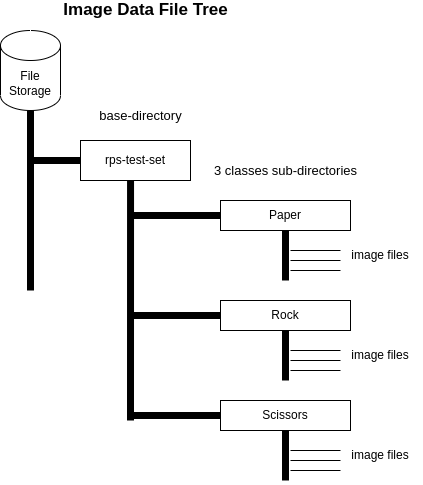

#####**List the files:**

In [ ]:
import os
dataset_dir = pathlib.Path(os.path.dirname(os.path.abspath(dataset_file)))
!ls $dataset_dir

rps  rps-test-set  rps_test.zip  rps.zip


**Merge Train and Test Data**

The `train` and `test` datasection are pre-split 80-20. Normally, that would be fine. 

But, methodicaly, to demonstrate slicing to `train` and `validate` slices later on, we will now merge the 2 downloaded splits, and have a single big data source.

In [ ]:
!cp -r /root/.keras/datasets/rps-test-set/* /root/.keras/datasets/rps

The `train` and `test` datasection are split 80-20. That is fine. but for methodical reasons, The straight forward way to do is to take them as is for training and validation respectively. Methodicaly, we will merge the 2, just to demonstrate the split capabilities of the method which follows in the next notebook cell.

####**Show Total Downloaded Number of Files Per Class**

In [ ]:
from os import listdir
from os.path import isfile, join
import os

class_dir_info = {}
file_ext = 'png'

base_data_dir = os.path.join(dataset_dir, 'rps')
for subdir_name in subdir_names:
  subdir = pathlib.Path(os.path.join(base_data_dir, subdir_name))
  files_count = len([file for file in os.listdir(subdir) if file.endswith(file_ext)])
  class_dir_info.update({'dir': subdir})
  print('{}: {} files'.format(subdir_name, files_count))

print('total file count: {}'.format(len(list(pathlib.Path(base_data_dir).glob('*/*.{}'.format(file_ext))))))

scissors: 964 files
paper: 964 files
rock: 964 files
total file count: 2892


***Visualization*** - take a brief look at randomly selected images from each class

## 3. Create the Input Pipeline
---


####**Some Values Setup**


- **batch size**: A batch size of 32 is a good starting point. There's a trade-off here, were a too small batch size might lead to a too slow processing due to lacking vectorization. A too large batch might leads to low accuracy and thus longer training time.



- **image_height**, **image_width**: The are tradeoffs in setting the input dimenssions: keeping details vs process load. Anyway, since source data image is mostly none size uniform, resizing is essential. Since the NN deployed here has 5 pooling modules, which reduce size overall by 32, the size was set to a multiply of 32.

####**Create the image.ImageDataGenerator**

The `ImageDataGenerator` method defines the dataset, plus, in the same time it sets up the performance parameters.


The method supports a wide set of attributes for pre-processing the data. Here below is an example with just a fraction of those supported attributes

Notes on the attributes used:

- **rotation_range**: Int. Degree range for random rotations.
  
- **shear_range**: Shear angle in counter-clockwise direction in degrees

- **zoom_range**:Range for random zoom
    
- **fill_mode**: Points outside the boundaries of the input are filled according to the given mode.
  - constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
  - 'nearest': aaaaaaaa|abcd|dddddddd
  - 'reflect': abcddcba|abcd|dcbaabcd
  - 'wrap': abcdabcd|abcd|abcdabcd

- **horizontal_flip**: Boolean. Randomly flip inputs horizontally.
- **vertical_flip**: Boolean. Randomly flip inputs vertically.
- **rescale**:  multiply the data by the value provided after applying all other transformations).

- **validation_split**:  Fraction of images reserved for validation 



In [ ]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90, #Int. Degree range for random rotations.
    shear_range=10.0, 
    zoom_range=0.1,
    fill_mode='nearest', 
    horizontal_flip=True, 
    vertical_flip=False, 
    rescale=1./255,
    validation_split=0.2
)

####**Set Training data:**

#####**Create the Dataset**

Dataset is created by `flow_from_directory` method, based on source files resides in the specified directory.


Some Notes on Method's Attributes

- **directory**: Location of source files.

- **target_size**: The dimensions to which all images found will be resized. (default=(256, 256))
- **batch_size**: Size of the batches of data (default: 32).
- **shuffle**: Whether to shuffle the data (default: `True`) If set to `False`, **sorts the data in alphanumeric order**.

- **seed**: Optional random seed for shuffling and transformations.
- **color_mode**: Whether the images will be converted to have 1 or 3 color channels.
- **subset**: Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator. (default=None)

- **save_to_dir**: `None` or `str` (default: None). This allows you to optionally specify a directory to which to save the augmented pictures being generated (useful for visualizing what you are doing).
- **save_format**: one of "png", "jpeg", "bmp", "pdf", "ppm", "gif", "tif", "jpg" (only relevant if save_to_dir is set). Default: "png".

- **save_prefix**: Str. Prefix to use for filenames of saved pictures (only relevant if save_to_dir is set).

- **classes**: Optional list of classes, e.g. ['rock, 'paper', 'scissors'].  If not provided, the list of classes will be automatically inferred from the subdirectory names/structure under directory. (Default=None)

- **class_mode**:  Determines the type of label arrays that the generator yields. Default: "categorical". 

  **Important Note-Avoid a common mistake:** The selection of `class_mode` implicates on the type of `loss` which sould be sellected in `model.compile`, 
  
  e.g. if `class_mode`=`categorical`, then `model.compile`(`loss`) should be `CategoricalCrossentropy` but not `SparseCategoricalCrossentropy`, otherwise, `model.fit` will end up with an error.

  - **Optional values**:

    - **"categorical"** - A 2D output, i.e. a one-hot encoding. This fits multiclass decisions. E.g. for `rock, paper, scissors`:[[1,0,0], [0,1,0],[0,0,1]]
    - **"binary"** - A 1D output, for binary classification.
    - **"sparse"** -  [0,1,2,3,4,....n] 
    - **"input"** -  for autoencoders, i.e. data is unlabeled - not in current scope.
    - **None** - No  classes are yielded by generator. useful to use with `model.predict()` 



**Returns**:

A DirectoryIterator yielding tuples of (x, y) where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels.


In the following, 2 Datasets are created: for **Training** and for **Validation**


#####**Create Train Dataset**